## Dataset for Rock_paper_scissors

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2019-08-21 08:24:10--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.163.208, 2404:6800:4007:810::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.163.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  4.22MB/s    in 43s     

2019-08-21 08:24:54 (4.50 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2019-08-21 08:24:55--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.163.208, 2404:6800:4007:810::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.163.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip

In [5]:
import os
import zipfile

# Extracting for training dataset
local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

# Extracting for test dataset
local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [10]:
print(os.listdir('/tmp/rps'))
print(os.listdir('/tmp/rps-test-set'))


['paper', 'rock', 'scissors']
['paper', 'rock', 'scissors']


In [12]:
#  Seperating rock , paper ,scissors dir files
rock_dir     = os.path.join('/tmp/rps/rock')
paper_dir    = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

rock_files = os.listdir(rock_dir)
paper_files = os.listdir(paper_dir)
scissors_files = os.listdir(scissors_dir)
print('Total training rock images :', len(rock_files))
print('Total training paper images :', len(paper_files))
print('Total training scissors images :', len(scissors_files))

Total training rock images : 840
Total training paper images : 840
Total training scissors images : 840


In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
             for fname in rock_files[pic_index-2 : pic_index]]
next_paper = [ os.path.join(paper_dir, fname)
    for fname in paper_files[pic_index-2 : pic_index]]
next_scissors = [os.path.join(scissors_dir, fname)
    for fname in scissors_files[pic_index -2 : pic_index] ]

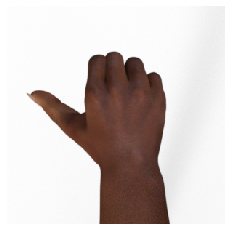

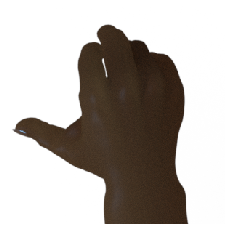

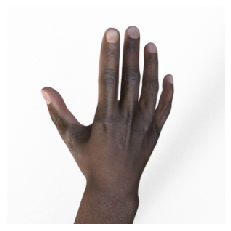

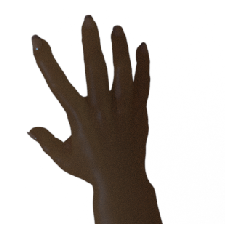

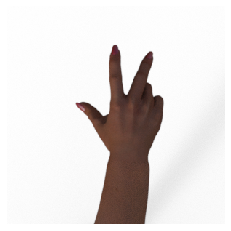

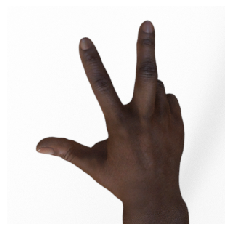

In [16]:
for i, img_path in enumerate(next_rock + next_paper + next_scissors ):
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [26]:
import tensorflow as tf
from tensorflow import keras
# import keras_preprocessing
# from tf.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_dir = '/tmp/rps'

training_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=40,
                                     width_shift_range=.2,
                                     height_shift_range=.2,
                                     shear_range=.2,
                                     zoom_range= .2,
                                      horizontal_flip=True,
                                      fill_mode='nearest'
                                     )

validation_dir = '/tmp/rps-test-set/'

validation_datagen = ImageDataGenerator(rescale = 1./255,
                                       rotation_range = 40,
                                       width_shift_range=.2,
                                       height_shift_range=.2,
                                       shear_range=.2,
                                       zoom_range=.2,
                                       horizontal_flip=True,
                                       fill_mode='nearest')

In [33]:
train_generator = training_datagen.flow_from_directory(
                          training_dir, target_size=(150,150),batch_size=30,
                            class_mode='categorical'
                            )
validation_generator = validation_datagen.flow_from_directory(
                          validation_dir, target_size=(150,150),batch_size=30,
                            class_mode='categorical'
                            )

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [44]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [45]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 128)      

In [46]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

In [ ]:
history = model.fit_generator(train_generator,epochs=25,
                            validation_data=validation_generator,
                             verbose=1)

Epoch 1/25
84/84 [==============================] - 87s 1s/step - loss: 1.1915 - accuracy: 0.3841 - val_loss: 0.9924 - val_accuracy: 0.5027
Epoch 2/25
84/84 [==============================] - 83s 987ms/step - loss: 0.8279 - accuracy: 0.6060 - val_loss: 0.5572 - val_accuracy: 0.7500
Epoch 3/25
84/84 [==============================] - 85s 1s/step - loss: 0.5326 - accuracy: 0.7734 - val_loss: 0.8043 - val_accuracy: 0.5914
Epoch 4/25
84/84 [==============================] - 90s 1s/step - loss: 0.3907 - accuracy: 0.8472 - val_loss: 0.3046 - val_accuracy: 0.8844
Epoch 5/25
84/84 [==============================] - 81s 967ms/step - loss: 0.2654 - accuracy: 0.9020 - val_loss: 0.4017 - val_accuracy: 0.8495
Epoch 6/25
84/84 [==============================] - 87s 1s/step - loss: 0.2254 - accuracy: 0.9163 - val_loss: 0.2058 - val_accuracy: 0.9220
Epoch 7/25
84/84 [==============================] - 121s 1s/step - loss: 0.1674 - accuracy: 0.9393 - val_loss: 0.1930 - val_accuracy: 0.9328
Epoch 8/25
84

In [ ]:
mode.save(rps.h5)
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training_accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation_accuracy')
plt.title("Training and validation accuracy")
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)